In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(plt.matplotlib.__path__)

['C:\\ML\\Anaconda\\lib\\site-packages\\matplotlib']


In [3]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
def createNodeList(n):
    Lis=[]
    for k in range(n):
        itemLi=[]
        for i in range(n):
            if i==k:continue
            itemLi.append(chr(i+ord('A')))
        Lis.append(itemLi)
    return Lis

In [5]:
def produceCompleteGraph(n):
    List=createNodeList(n)
    graph={}
    i=0
    for item in List:
        graph[chr(i+ord('A'))]=item
        i+=1
    return graph

In [6]:
produceCompleteGraph(5)

{'A': ['B', 'C', 'D', 'E'],
 'B': ['A', 'C', 'D', 'E'],
 'C': ['A', 'B', 'D', 'E'],
 'D': ['A', 'B', 'C', 'E'],
 'E': ['A', 'B', 'C', 'D']}

### customize for cuting some nodes design

In [7]:
def get_node_sucess(graph, node, cutsomenodes=0):
    Len=len(graph[node])
    return graph[node][:Len-cutsomenodes]

In [8]:
get_node_sucess(produceCompleteGraph(5),'A',0)

['B', 'C', 'D', 'E']

In [9]:
get_node_sucess(produceCompleteGraph(5),'A',2)

['B', 'C']

In [10]:
def goal_reached(checkPoint,dest):
    return checkPoint==dest
    ### return distance(checkPoint,dest)<eps

In [11]:
def get_node_sucessors(graph,frontnode,cutsomenodes=0):
    return graph.neighbors(frontnode)

def get_dist(path,graphBJ):
    dist=0
    for i in range(len(path)-1):
        dist+=graphBJ.get_edge_data(path[i],path[i+1])['distance']
    return dist

def get_lines(path,graphBJ):
    lines=set()
    for i in range(len(path)-1):
        if graphBJ.get_edge_data(path[i],path[i+1])['line'] not in lines:
            lines.add(graphBJ.get_edge_data(path[i],path[i+1])['line'])
    return len(lines)

#### pathes 是一些形如下式的list
--- pathes=*[['A', 'F'],
 ['A', 'B', 'F'],
 ['A', 'C', 'F'],
 ['A', 'D', 'F'],
 ['A', 'E', 'F']]* 
---按一定策略对该list进行排序，在搜索中我们使用的是pop(0)类似广度优先，排在前面的优先查找，所有的策略都围绕着该list排序进行，加一beam设置，有值时，即表示取前面部份，后面省掉(剪枝)，默认值-1不剪

In [12]:
def sort_pathes(pathes,func,beam=-1):
    return sorted(pathes,key=func)[:beam]

In [13]:
def doNothing(pathes):
    return pathes

In [14]:
def min_stations_first(pathes):
    return sort_pathes(pathes,lambda path:(len(path)),beam=100)

In [15]:
def max_stations_first(pathes):
    return sort_pathes(pathes,lambda path:(-len(path)),beam=100)

```
def get_distance(site1,site2,graph):
    pass
```

```
def get_path_dist(path):
    if len(path)<2:return 0
    dist=0
    for i in range(len(path)):
        dist+=get_distance(path[i],path[i+1],BjSub)
    return dist
```

```
def min_transfer_first(pathes):
    pass
```

```
def min_distance_first(pathes):
    return sort_pathes(pathes,get_path_dist,beam=10)
```

In [16]:
def search(graph, start, dest, get_successors=get_node_sucessors, is_goal_satisfy=goal_reached,search_strategy=min_stations_first):
    pathes=[[start]]
    seen=set()
    found_pathes=[]
    
    while pathes:
        path=pathes.pop(0)
        frontnode=path[-1]
        if frontnode in seen: continue
        
        for nextnode in get_successors(graph,frontnode,cutsomenodes=0):
            if nextnode in path: continue
            new_path=path+[nextnode]
            pathes.append(new_path)
            if is_goal_satisfy(nextnode, dest):
                found_pathes.append(new_path)
                return found_pathes
        pathes=search_strategy(pathes)
        #print(pathes)
        seen.add(frontnode)
    return found_pathes

In [17]:
GraphB=produceCompleteGraph(6)

In [18]:
search(GraphB,'A','F',get_node_sucess, goal_reached)

[['A', 'F']]

In [19]:
search(GraphB,'A','F',get_node_sucess, goal_reached,max_stations_first)

[['A', 'F']]

In [20]:
search(GraphB,'D','F',get_node_sucess,search_strategy=doNothing)

[['D', 'F']]

# 方法一 获取地铁图信息有些不完整，且有一些燥声

In [21]:
import re
import requests
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
r = requests.get(url, headers=headers).content.decode('utf8')

text = re.findall("(table log-set-param=\"table_view\" width=\"658\".*)",r)[0]

link = re.findall("href=\"([^\"]*)\">北京地铁",text)

In [22]:
link

['/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF',
 '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%B

In [23]:
def city_graph():

    import re
    import requests
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
    r = requests.get(url, headers=headers).content.decode('utf8')
    type(r)
    text = re.findall("(table log-set-param=\"table_view\" width=\"658\".*)",r)[0]
    links = re.findall("href=\"([^\"]*)\">北京地铁",text)
    from collections import defaultdict
    cities_connection = defaultdict(list)
    for eachlink in links:
        url ='https://baike.baidu.com'+eachlink
        #print(url)
        text = requests.get(url, headers=headers).content.decode('utf8')
        #path  = re.findall(">(\w+[^时刻表突破开通]——\w+[^时刻表创新通线])<",text)
        path  = re.findall(">(\w+——\w+)<",text)
        #print(path)
        for adj in path:
            node1,node2 = adj.split("——")
            cities_connection[node1].append(node2)
            cities_connection[node2].append(node1)
    return cities_connection


In [24]:
BjSub=city_graph()

### 由下图可见明显有异常孤立点

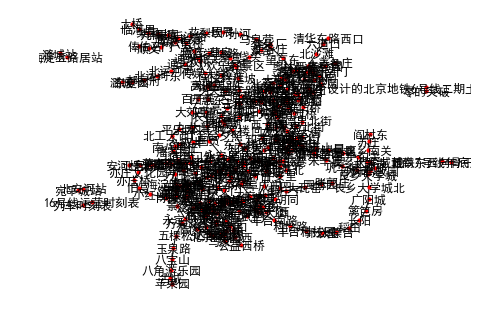

In [25]:
nx.draw(nx.Graph(BjSub),with_labels=True,node_size=10)

In [30]:
search(BjSub,"天安门东","王府井",get_node_sucess,search_strategy=max_stations_first)

[['天安门东', '王府井']]

In [31]:
get_node_sucess(BjSub,'同济南路')

['荣昌东街', '经海路']

In [32]:
search(BjSub,"天安门东","稻田",get_node_sucess,goal_reached,min_stations_first)

[['天安门东',
  '天安门西',
  '西单',
  '复兴门',
  '南礼士路',
  '木樨地',
  '军事博物馆',
  '公主坟',
  '莲花桥',
  '六里桥',
  '七里庄',
  '丰台东大街',
  '丰台南路',
  '科怡路',
  '丰台科技园',
  '郭公庄',
  '大葆台',
  '稻田']]

In [33]:
search(BjSub,"天安门东","稻田",get_node_sucess,goal_reached,max_stations_first)

[['天安门东',
  '天安门西',
  '西单',
  '复兴门',
  '南礼士路',
  '木樨地',
  '军事博物馆',
  '公主坟',
  '莲花桥',
  '六里桥',
  '六里桥东',
  '北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台路',
  '红庙',
  '大望路',
  '国贸',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口',
  '天坛东门',
  '蒲黄榆',
  '刘家窑',
  '宋家庄',
  '石榴庄',
  '大红门',
  '角门东',
  '角门西',
  '草桥',
  '纪家庙',
  '首经贸',
  '丰台站',
  '泥洼',
  '西局',
  '七里庄',
  '丰台东大街',
  '丰台南路',
  '科怡路',
  '丰台科技园',
  '郭公庄',
  '大葆台',
  '稻田']]

# 方法二，基本涵盖了所有数据
## 参考刘亚南同学的方法，补全了大兴线与16号线数据

In [34]:
lines=["北京地铁1号线","北京地铁2号线","北京地铁4号线","北京地铁5号线","北京地铁6号线","北京地铁7号线","北京地铁8号线",
       "北京地铁9号线","北京地铁10号线","北京地铁13号线","北京地铁14号线","北京地铁15号线","北京地铁16号线","北京地铁大兴线",
       "北京地铁八通线","北京地铁昌平线","北京地铁房山线","北京地铁亦庄线"]

In [35]:
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
web_text=''
for line in lines:
    web_text+=requests.get("https://baike.baidu.com/item/"+line,headers=headers).content.decode('utf-8')

In [36]:
pattern='<.*?>'
text=re.sub(pattern,'',web_text)
t=re.sub("\r\n","",text)

In [37]:
dist1=re.findall("[\u4e00-\u9fa5\d]+线相邻.*上行",t)

In [38]:
dist14=re.findall("14号线.*上行",t)
# line14

In [39]:
dist14

['14号线（西段）相邻站间距信息统计表起始/终到车站区间距离（米）方向张郭庄——园博园1345上行/下行园博园——大瓦窑4073上行/下行大瓦窑——郭庄子1236上行/下行郭庄子——大井2044上行/下行大井——七里庄1579上行/下行七里庄——西局845上行/下行14号线（东段）相邻站间距信息统计表起始/终到车站区间距离（米）方向北京南站——陶然桥887上行/下行陶然桥——永定门外1063上行/下行永定门外——景泰1119上行/下行景泰——蒲黄榆1025上行/下行蒲黄榆——方庄1486上行/下行方庄——十里河1618上行/下行十里河——南八里庄1147上行/下行南八里庄——北工大西门1276上行/下行北工大西门——平乐园1128上行/下行平乐园——九龙山897上行/下行九龙山——大望路1780上行/下行大望路——红庙708上行/下行红庙——金台路894上行/下行金台路——朝阳公园1085上行/下行朝阳公园——枣营1221上行/下行枣营——东风北桥2173上行/下行东风北桥——将台1600上行/下行将台——高家园1171上行/下行高家园——望京南676上行/下行望京南——阜通1168上行/下行阜通——望京903上行/下行望京——东湖渠1283上行/下行东湖渠——来广营1100上行/下行来广营——善各庄1364上行',
 '14号线（西段）首末车时刻表车站名称开往西局（上行']

In [40]:
dist14=[re.sub("14号线（东段）相邻站间距信息统计表起始/终到车站区间距离（米）方向","",dist14[0])]

In [41]:
dist14

['14号线（西段）相邻站间距信息统计表起始/终到车站区间距离（米）方向张郭庄——园博园1345上行/下行园博园——大瓦窑4073上行/下行大瓦窑——郭庄子1236上行/下行郭庄子——大井2044上行/下行大井——七里庄1579上行/下行七里庄——西局845上行/下行北京南站——陶然桥887上行/下行陶然桥——永定门外1063上行/下行永定门外——景泰1119上行/下行景泰——蒲黄榆1025上行/下行蒲黄榆——方庄1486上行/下行方庄——十里河1618上行/下行十里河——南八里庄1147上行/下行南八里庄——北工大西门1276上行/下行北工大西门——平乐园1128上行/下行平乐园——九龙山897上行/下行九龙山——大望路1780上行/下行大望路——红庙708上行/下行红庙——金台路894上行/下行金台路——朝阳公园1085上行/下行朝阳公园——枣营1221上行/下行枣营——东风北桥2173上行/下行东风北桥——将台1600上行/下行将台——高家园1171上行/下行高家园——望京南676上行/下行望京南——阜通1168上行/下行阜通——望京903上行/下行望京——东湖渠1283上行/下行东湖渠——来广营1100上行/下行来广营——善各庄1364上行']

In [42]:
dist1.extend(dist14)

In [43]:
dist1[6]=re.sub(".*8号线",'8号线',dist1[6])

In [44]:
dist1[6]

'8号线相邻站间距信息统计表起始/终到车站区间距离方向朱辛庄——育知路2318米上行/下行育知路——平西府1985米上行/下行平西府——回龙观东大街2056米上行/下行回龙观东大街——霍营1114米上行/下行霍营——育新1894米上行/下行育新——西小口1543米上行/下行西小口——永泰庄1041米上行/下行永泰庄——林萃桥2553米上行/下行林萃桥——森林公园南门2555米上行/下行森林公园南门——奥林匹克公园1016米上行/下行奥林匹克公园——奥体中心1667米上行/下行奥体中心——北土城900米上行/下行北土城——安华桥1018米上行/下行安华桥——安德里北街1274米上行/下行安德里北街——鼓楼大街1083米上行/下行鼓楼大街——什刹海1188米上行/下行什刹海——南锣鼓巷902米上行'

In [45]:
dist16=re.findall("站区间距离（km）.+",t)
# line16,ignore

In [46]:
dist16

['站区间距离（km）西苑～农大南路3农大南路~马连洼1.6马连洼～西北旺2.1西北旺～永丰南2永丰南～永丰1.3永丰～屯佃2屯佃～稻香湖路2.5稻香湖路～温阳路2温阳路～北安河2.6']

In [47]:
dist16=[re.sub("站区间距离（km）","16号线相邻站间距信息统计表起始/终到车站区间距离方向",dist16[0])]
dist16=[re.sub("～","——",dist16[0])]
dist16=[re.sub("~","——",dist16[0])]

In [48]:
dist16

['16号线相邻站间距信息统计表起始/终到车站区间距离方向西苑——农大南路3农大南路——马连洼1.6马连洼——西北旺2.1西北旺——永丰南2永丰南——永丰1.3永丰——屯佃2屯佃——稻香湖路2.5稻香湖路——温阳路2温阳路——北安河2.6']

In [49]:
dist1.extend(dist16)

In [50]:
dist1

['1号线相邻站间距信息统计表起始/终到车站区间距离方向苹果园——古城2606米上行/下行古城——八角游乐园1921米上行/下行八角游乐园——八宝山1953米上行/下行八宝山——玉泉路1479米上行/下行玉泉路——五棵松1810米上行/下行五棵松——万寿路1778米上行/下行万寿路——公主坟1313米上行/下行公主坟——军事博物馆1172米上行/下行军事博物馆——木樨地1166米上行/下行木樨地——南礼士路1291米上行/下行南礼士路——复兴门424米上行/下行复兴门——西单1590米上行/下行西单——天安门西1217米上行/下行天安门西——天安门东925米上行/下行天安门东——王府井852米上行/下行王府井——东单774米上行/下行东单——建国门1230米上行/下行建国门——永安里1377米上行/下行永安里——国贸790米上行/下行国贸——大望路1385米上行/下行大望路——四惠1673米上行/下行四惠——四惠东1714米上行',
 '2号线相邻站间距信息统计表起始/终到车站区间距离方向西直门——车公庄909米上行/下行车公庄——阜成门960米上行/下行阜成门——复兴门1832米上行/下行复兴门——长椿街1234米上行/下行长椿街——宣武门929米上行/下行宣武门——和平门851米上行/下行和平门——前门1171米上行/下行前门——崇文门1634米上行/下行崇文门——北京站1023米上行/下行北京站——建国门945米上行/下行建国门——朝阳门1763米上行/下行朝阳门——东四十条1027米上行/下行东四十条——东直门824米上行/下行东直门——雍和宫2228米上行/下行雍和宫——安定门794米上行/下行安定门——鼓楼大街1237米上行/下行鼓楼大街——积水潭1766米上行/下行积水潭——西直门1899米上行',
 '4号线相邻站间距信息统计表起始/终到车站区间距离（米）方向安河桥北——北宫门1363上行/下行北宫门——西苑1251上行/下行西苑——圆明园1672上行/下行圆明园——北京大学东门1295上行/下行北京大学东门——中关村887上行/下行中关村——海淀黄庄900上行/下行海淀黄庄——人民大学1063上行/下行人民大学——魏公村1051上行/下行魏公村——国家图书馆1658上行/下行国家图书馆——动物园1517上行/下行动物园——西直门1441上行/下行西

In [51]:
tmp=[]
for d in dist1:
    tmp.append(re.sub("上行/下行",'to',d))

In [52]:
dist_list=[]
for t in tmp:
    ti=re.sub("to|方向","\n",t)
    tj=re.sub("上行","",ti)
    tk=re.sub("千米","",tj)
    tf=re.sub("（米）|米","",tk)
    dist_list.append(re.findall(".*",tf))

In [53]:
for item in dist_list:
    for it in item:
        if it=='':item.remove(it)
        

In [54]:
dist_list[17]

['16号线相邻站间距信息统计表起始/终到车站区间距离',
 '西苑——农大南路3农大南路——马连洼1.6马连洼——西北旺2.1西北旺——永丰南2永丰南——永丰1.3永丰——屯佃2屯佃——稻香湖路2.5稻香湖路——温阳路2温阳路——北安河2.6']

In [55]:
test=re.split('([\d.]+)',dist_list[17][1])

In [56]:
test

['西苑——农大南路',
 '3',
 '农大南路——马连洼',
 '1.6',
 '马连洼——西北旺',
 '2.1',
 '西北旺——永丰南',
 '2',
 '永丰南——永丰',
 '1.3',
 '永丰——屯佃',
 '2',
 '屯佃——稻香湖路',
 '2.5',
 '稻香湖路——温阳路',
 '2',
 '温阳路——北安河',
 '2.6',
 '']

In [57]:
for i in range(len(test)-1):
    if i%2!=0:continue
    test[i]=test[i]+test[i+1]

In [58]:
line16=[]
for i in range(len(test)):
    if i%2==0:
        line16.append(test[i])

In [59]:
line16.remove('')

In [60]:
line16

['西苑——农大南路3',
 '农大南路——马连洼1.6',
 '马连洼——西北旺2.1',
 '西北旺——永丰南2',
 '永丰南——永丰1.3',
 '永丰——屯佃2',
 '屯佃——稻香湖路2.5',
 '稻香湖路——温阳路2',
 '温阳路——北安河2.6']

In [61]:
dist_list[17].pop(-1)

'西苑——农大南路3农大南路——马连洼1.6马连洼——西北旺2.1西北旺——永丰南2永丰南——永丰1.3永丰——屯佃2屯佃——稻香湖路2.5稻香湖路——温阳路2温阳路——北安河2.6'

In [62]:
dist_list[17]

['16号线相邻站间距信息统计表起始/终到车站区间距离']

In [63]:
for item in line16:
    dist_list[17].append(item)

In [64]:
dist_list

[['1号线相邻站间距信息统计表起始/终到车站区间距离',
  '苹果园——古城2606',
  '古城——八角游乐园1921',
  '八角游乐园——八宝山1953',
  '八宝山——玉泉路1479',
  '玉泉路——五棵松1810',
  '五棵松——万寿路1778',
  '万寿路——公主坟1313',
  '公主坟——军事博物馆1172',
  '军事博物馆——木樨地1166',
  '木樨地——南礼士路1291',
  '南礼士路——复兴门424',
  '复兴门——西单1590',
  '西单——天安门西1217',
  '天安门西——天安门东925',
  '天安门东——王府井852',
  '王府井——东单774',
  '东单——建国门1230',
  '建国门——永安里1377',
  '永安里——国贸790',
  '国贸——大望路1385',
  '大望路——四惠1673',
  '四惠——四惠东1714'],
 ['2号线相邻站间距信息统计表起始/终到车站区间距离',
  '西直门——车公庄909',
  '车公庄——阜成门960',
  '阜成门——复兴门1832',
  '复兴门——长椿街1234',
  '长椿街——宣武门929',
  '宣武门——和平门851',
  '和平门——前门1171',
  '前门——崇文门1634',
  '崇文门——北京站1023',
  '北京站——建国门945',
  '建国门——朝阳门1763',
  '朝阳门——东四十条1027',
  '东四十条——东直门824',
  '东直门——雍和宫2228',
  '雍和宫——安定门794',
  '安定门——鼓楼大街1237',
  '鼓楼大街——积水潭1766',
  '积水潭——西直门1899'],
 ['4号线相邻站间距信息统计表起始/终到车站区间距离',
  '安河桥北——北宫门1363',
  '北宫门——西苑1251',
  '西苑——圆明园1672',
  '圆明园——北京大学东门1295',
  '北京大学东门——中关村887',
  '中关村——海淀黄庄900',
  '海淀黄庄——人民大学1063',
  '人民大学——魏公村1051',
  '魏公村——国家图书馆1658',
  '国家图书馆——动物园1517',
  '

In [65]:
distance=[]
for str_list in dist_list:
    for s in str_list[1:]:
        seperated=[]
        seperated.append(re.split("——",s)[0])
        seperated.extend(re.findall("[\u4e00-\u9fa5]+",re.split("——",s)[1]))
        nostr=re.findall("\d+",re.split("——",s)[1])[0]
        if float(nostr)<10:
            nostr=float(nostr)*1000
#         if "-" in nostr:
#             nostr=float(re.split("-",nostr)[0])*float(re.split("-",nostr)[1])
        dic=dict()
        dic["distance"]=int(nostr)
        dic["line"]=str_list[0][:2]
        seperated.append(dic)
        distance.append(tuple(seperated))

In [66]:
distance

[('苹果园', '古城', {'distance': 2606, 'line': '1号'}),
 ('古城', '八角游乐园', {'distance': 1921, 'line': '1号'}),
 ('八角游乐园', '八宝山', {'distance': 1953, 'line': '1号'}),
 ('八宝山', '玉泉路', {'distance': 1479, 'line': '1号'}),
 ('玉泉路', '五棵松', {'distance': 1810, 'line': '1号'}),
 ('五棵松', '万寿路', {'distance': 1778, 'line': '1号'}),
 ('万寿路', '公主坟', {'distance': 1313, 'line': '1号'}),
 ('公主坟', '军事博物馆', {'distance': 1172, 'line': '1号'}),
 ('军事博物馆', '木樨地', {'distance': 1166, 'line': '1号'}),
 ('木樨地', '南礼士路', {'distance': 1291, 'line': '1号'}),
 ('南礼士路', '复兴门', {'distance': 424, 'line': '1号'}),
 ('复兴门', '西单', {'distance': 1590, 'line': '1号'}),
 ('西单', '天安门西', {'distance': 1217, 'line': '1号'}),
 ('天安门西', '天安门东', {'distance': 925, 'line': '1号'}),
 ('天安门东', '王府井', {'distance': 852, 'line': '1号'}),
 ('王府井', '东单', {'distance': 774, 'line': '1号'}),
 ('东单', '建国门', {'distance': 1230, 'line': '1号'}),
 ('建国门', '永安里', {'distance': 1377, 'line': '1号'}),
 ('永安里', '国贸', {'distance': 790, 'line': '1号'}),
 ('国贸', '大望路', {'distance': 1

In [67]:
graphBJ=nx.Graph()
graphBJ.add_edges_from(distance)

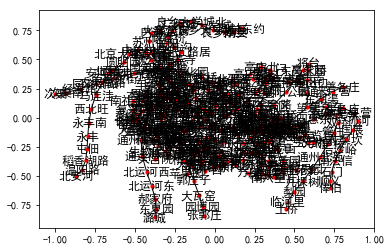

In [68]:
nx.draw_networkx(graphBJ,with_Labels=True,node_size=10)

In [69]:
graphBJ["南法信"]

AtlasView({'后沙峪': {'distance': 4576, 'line': '15'}, '石门': {'distance': 2712, 'line': '15'}})

In [70]:
graphBJ.get_edge_data("南法信","后沙峪")

{'distance': 4576, 'line': '15'}

In [71]:
graphBJ.neighbors('后沙峪')

In [72]:
graphBJ.order()

296

In [73]:
graphBJ.size()

335

In [74]:
del(get_node_sucessors)

In [75]:
def get_node_sucessors(graph,frontnode,cutsomenodes=0):
    return graph.neighbors(frontnode)

def get_dist(path,graphBJ):
    dist=0
    for i in range(len(path)-1):
        dist+=graphBJ.get_edge_data(path[i],path[i+1])['distance']
    return dist

def get_lines(path,graphBJ):
    lines=set()
    for i in range(len(path)-1):
        if graphBJ.get_edge_data(path[i],path[i+1])['line'] not in lines:
            lines.add(graphBJ.get_edge_data(path[i],path[i+1])['line'])
    return len(lines)

In [76]:
get_dist(['荣京东街',
  '万源街',
  '亦庄文化园',
  '亦庄桥',
  '旧宫'],graphBJ)

5793

In [77]:
get_lines(['荣京东街',
  '万源街',
  '亦庄文化园',
  '亦庄桥',
  '旧宫'],graphBJ)

1

In [78]:
def min_transfer(pathes):
    return sort_pathes(pathes,lambda path:(get_lines(path,graphBJ)),beam=100)

In [79]:
def min_distance(pathes):
    return sort_pathes(pathes,lambda path:(get_dist(path,graphBJ)),beam=100)

`def search(graph, start, dest, get_successors=get_node_sucessors, is_goal_satisfy=goal_reached,search_strategy=min_stations_first):`

# Default is Min stations first

In [80]:
search(graphBJ,"天安门东","清源路")

[['天安门东',
  '天安门西',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥',
  '新宫',
  '西红门',
  '高店北',
  '高店南',
  '枣园',
  '清源路']]

# 最短距离

In [81]:
search(graphBJ,"清源路","天安门东",search_strategy=min_distance)

[['清源路',
  '枣园',
  '高店南',
  '高店北',
  '西红门',
  '新宫',
  '公益西桥',
  '角门西',
  '马家堡',
  '北京南站',
  '陶然亭',
  '菜市口',
  '宣武门',
  '西单',
  '天安门西',
  '天安门东']]

# 最少换乘

In [82]:
search(graphBJ,"清源路","天安门东",search_strategy=min_transfer)

[['清源路',
  '枣园',
  '高店南',
  '高店北',
  '西红门',
  '新宫',
  '公益西桥',
  '角门西',
  '马家堡',
  '北京南站',
  '陶然亭',
  '菜市口',
  '宣武门',
  '西单',
  '天安门西',
  '天安门东']]

# 最多站点（旅游磨时专属)

In [83]:
search(graphBJ,"天安门东","清源路",search_strategy=max_stations_first)

[['天安门东',
  '天安门西',
  '西单',
  '复兴门',
  '南礼士路',
  '木樨地',
  '军事博物馆',
  '公主坟',
  '莲花桥',
  '六里桥',
  '六里桥东',
  '北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '东大桥',
  '呼家楼',
  '金台路',
  '红庙',
  '大望路',
  '国贸',
  '双井',
  '广渠门外',
  '广渠门内',
  '磁器口',
  '天坛东门',
  '蒲黄榆',
  '刘家窑',
  '宋家庄',
  '石榴庄',
  '大红门',
  '角门东',
  '角门西',
  '公益西桥',
  '新宫',
  '西红门',
  '高店北',
  '高店南',
  '枣园',
  '清源路']]

# Mark
## `sort_pathes(pathes,lambda path:(get_dist(path,graphBJ)),`**beam=** <font color=#00ffff size=3>100</font>)

beam =-1, 有可能搜索不到路径，设为100基本能找到，有待进一步研究
